In [ ]:
# Based on the datacamp course : https://www.datacamp.com/tutorial/an-introduction-to-using-transformers-and-hugging-face
# Modified by Mehdi Ammi, Univ. Paris 8

# Theoretical introduction to Transformers

** Other ressouces **
- [Introduction to Transformers (youtube course)](https://www.youtube.com/watch?v=EvH-qJKSZV8&ab_channel=CNRS-FormationFIDLE)

## The Emergence of Transformer Models

The deep learning field has been experiencing a seismic shift, thanks to the emergence and rapid evolution of Transformer models.

These groundbreaking architectures have not just redefined the standards in Natural Language Processing (NLP) but have broadened their horizons to revolutionize numerous facets of artificial intelligence.

Characterized by their unique attention mechanisms and parallel processing abilities, Transformer models stand as a testament to the innovative leaps in understanding and generating human language with an accuracy and efficiency previously unattainable.

First appeared in 2017 in the [“Attention is all you need”](https://arxiv.org/abs/1706.03762) article by Google, the transformer architecture is at the heart of groundbreaking models like ChatGPT, sparking a new wave of excitement in the AI community. They've been instrumental in OpenAI's cutting-edge language models and played a key role in DeepMind's AlphaStar.

In this transformative era of AI, the significance of Transformer models for aspiring data scientists and NLP practitioners cannot be overstated.

### What Are Transformers?

Transformers were first developed to solve the problem of sequence transduction, or neural machine translation, which means they are meant to solve any task that transforms an input sequence to an output sequence. This is why they are called “Transformers”.

But let’s start from the beginning.

### What Are Transformer Models?

A transformer model is a neural network that learns the context of sequential data and generates new data out of it.

To put it simply:

*A transformer is a type of artificial intelligence model that learns to understand and generate human-like text by analyzing patterns in large amounts of text data.*

Transformers are a current state-of-the-art NLP model and are considered the evolution of the encoder-decoder architecture. However, while the encoder-decoder architecture relies mainly on Recurrent Neural Networks (RNNs) to extract sequential information, Transformers completely lack this recurrency.

So, how do they do it?

They are specifically designed to comprehend context and meaning by analyzing the relationship between different elements, and they rely almost entirely on a mathematical technique called attention to do so.

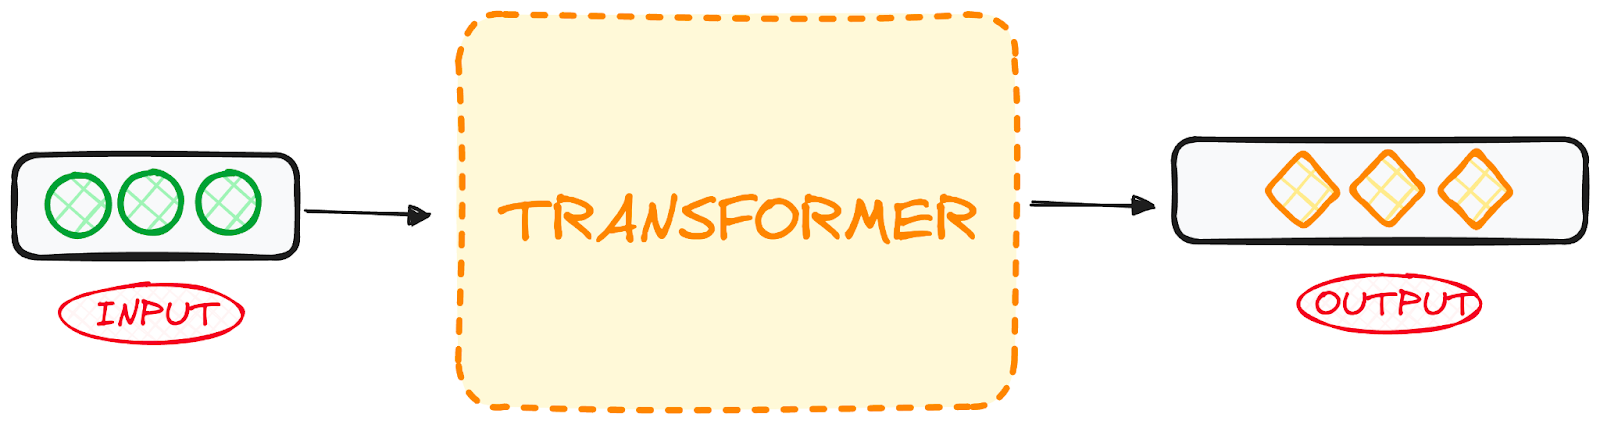

#### Historical Context

Originating from a 2017 research paper by Google, transformer models are one of the most recent and influential developments in the Machine Learning field. The first Transformer model was explained in the influential paper [“Attention is all you need”](https://arxiv.org/abs/1706.03762)

This pioneering concept was not just a theoretical advancement but also found practical implementation, notably in TensorFlow's Tensor2Tensor package. Furthermore, the Harvard NLP group contributed to this burgeoning field by offering an annotated guide to the paper, supplemented with a PyTorch implementation.

Their introduction has spurred a significant surge in the field, often referred to as Transformer AI. This revolutionary model laid the groundwork for subsequent breakthroughs in the realm of large language models, including BERT. By 2018, these developments were already being hailed as a watershed moment in NLP.

In 2020, researchers at OpenAI announced [GPT-3](https://arxiv.org/abs/2005.14165). Within weeks, GPT-3's versatility was quickly demonstrated when people were using it to create poems, programs, songs, websites and more captivating the imagination of users globally.

In a 2021 paper, Stanford scholars aptly termed these innovations foundation models, underscoring their foundational role in reshaping AI. Their work highlights how transformer models have not only revolutionized the field but also pushed the frontiers of what's achievable in artificial intelligence, heralding a new era of possibilities.

“We are in a time where simple methods like neural networks are giving us an explosion of new capabilities,” Ashish Vaswani, an entrepreneur and former senior staff research scientist at Google

### The Shift from RNN Models like LSTM to Transformers for NLP Problems

At the time of the Transformer model introduction, RNNs were the preferred approach for dealing with sequential data, which is characterized by a specific order in its input.

RNNs function similarly to a feed-forward neural network but process the input sequentially, one element at a time.

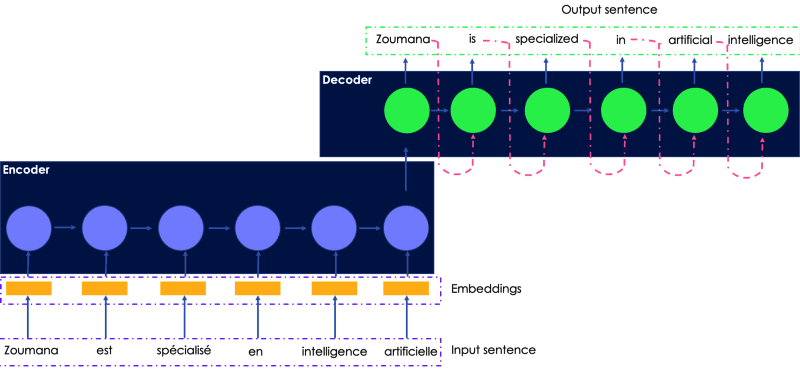

Transformers were inspired by the encoder-decoder architecture found in RNNs. However, Instead of using recurrence, the Transformer model is completely based on the Attention mechanism.

Besides improving RNN performance, Transformers have provided a new architecture to solve many other tasks, such as text summarization, image captioning, and speech recognition.

So, what are RNNs' main problems? They are quite ineffective for NLP tasks for two main reasons:

 - They process the input data sequentially, one after the other. Such a recurrent process does not make use of modern graphics processing units (GPUs), which were designed for parallel computation and, thus, makes the training of such models quite slow.
 - They become quite ineffective when elements are distant from one another. This is due to the fact that information is passed at each step and the longer the chain is, the more probable the information is lost along the chain.

The shift from Recurrent Neural Networks (RNNs) like LSTM to Transformers in NLP is driven by these two main problems and Transformers' ability to assess both of them by taking advantage of the Attention mechanism improvements:

 - Pay attention to specific words, no matter how distant they are.
 - Boost the performance speed.
 
Thus, Transformers became a natural improvement of RNNs.

Next, let’s take a look at how transformers work.

### The Transformer Architecture

#### Overview

Originally devised for sequence transduction or neural machine translation, transformers excel in converting input sequences into output sequences. It is the first transduction model relying entirely on self-attention to compute representations of its input and output without using sequence-aligned RNNs or convolution. The main core characteristic of the Transformers architecture is that they maintain the encoder-decoder model.

If we start considering a Transformer for language translation as a simple black box, it would take a sentence in one language, English for instance, as an input and output its translation in English.

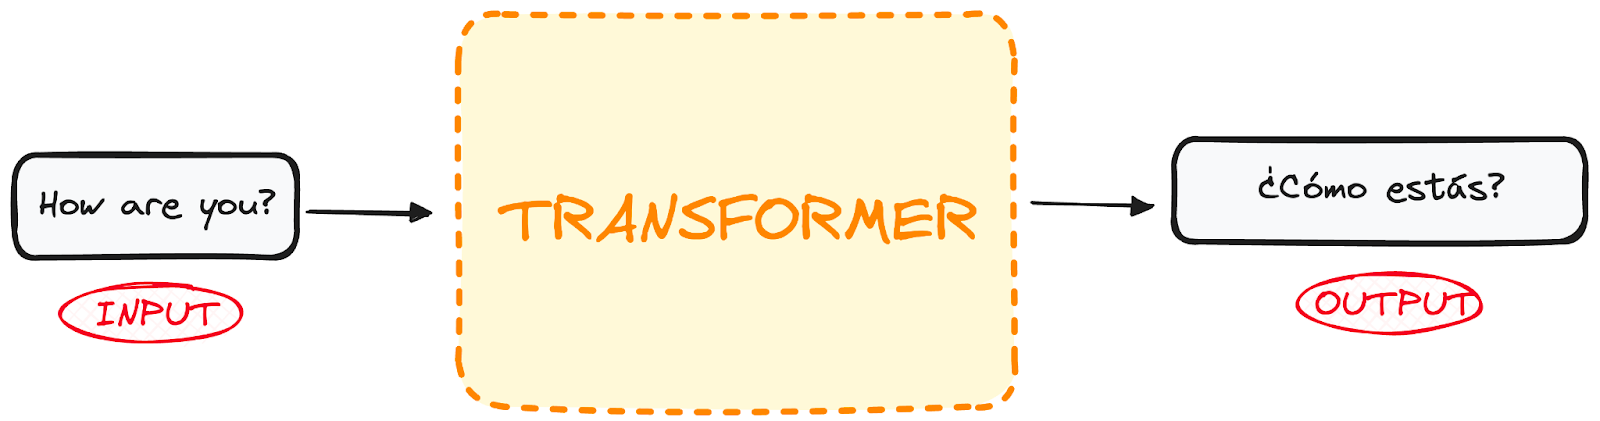

If we dive a little bit, we observe that this black box is composed of two main parts:

1. The encoder takes in our input and outputs a matrix representation of that input. For instance, the English sentence “How are you?”
2. The decoder takes in that encoded representation and iteratively generates an output. In our example, the translated sentence “¿Cómo estás?”

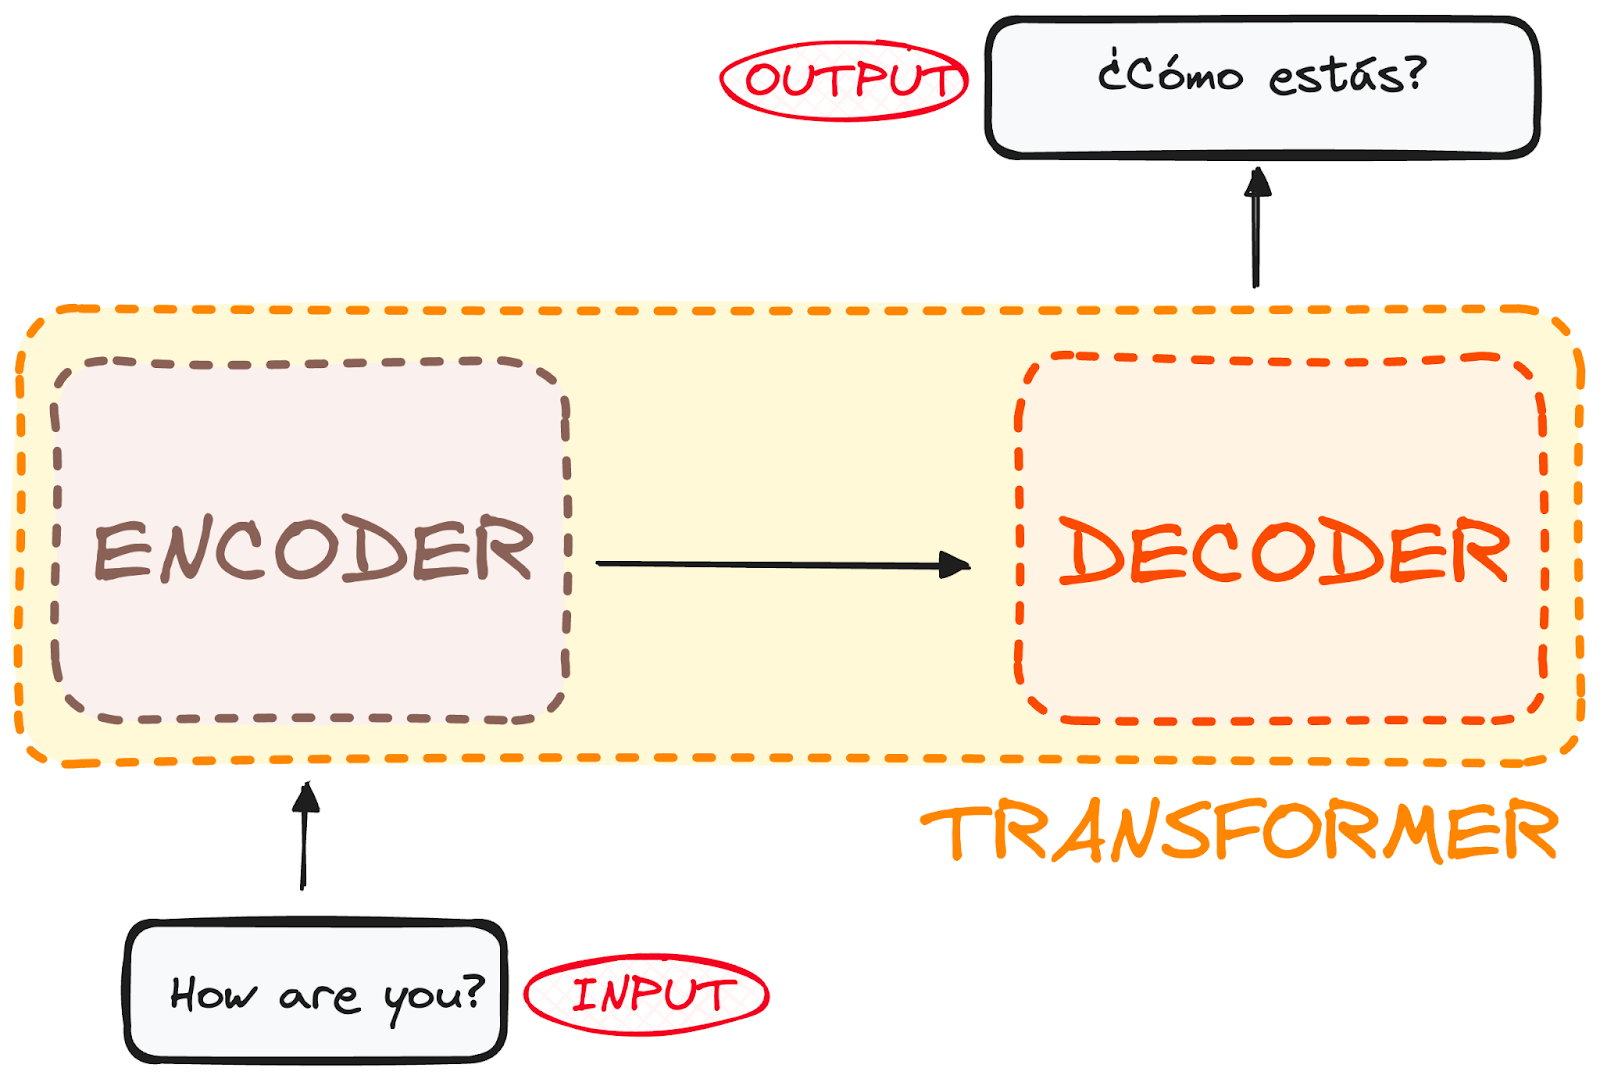

However, both the encoder and the decoder are actually a stack with multiple layers (same number for each). All encoders present the same structure, and the input gets into each of them and is passed to the next one. All decoders present the same structure as well and get the input from the last encoder and the previous decoder.

The original architecture consisted of 6 encoders and 6 decoders, but we can replicate as many layers as we want. So let’s assume N layers of each.

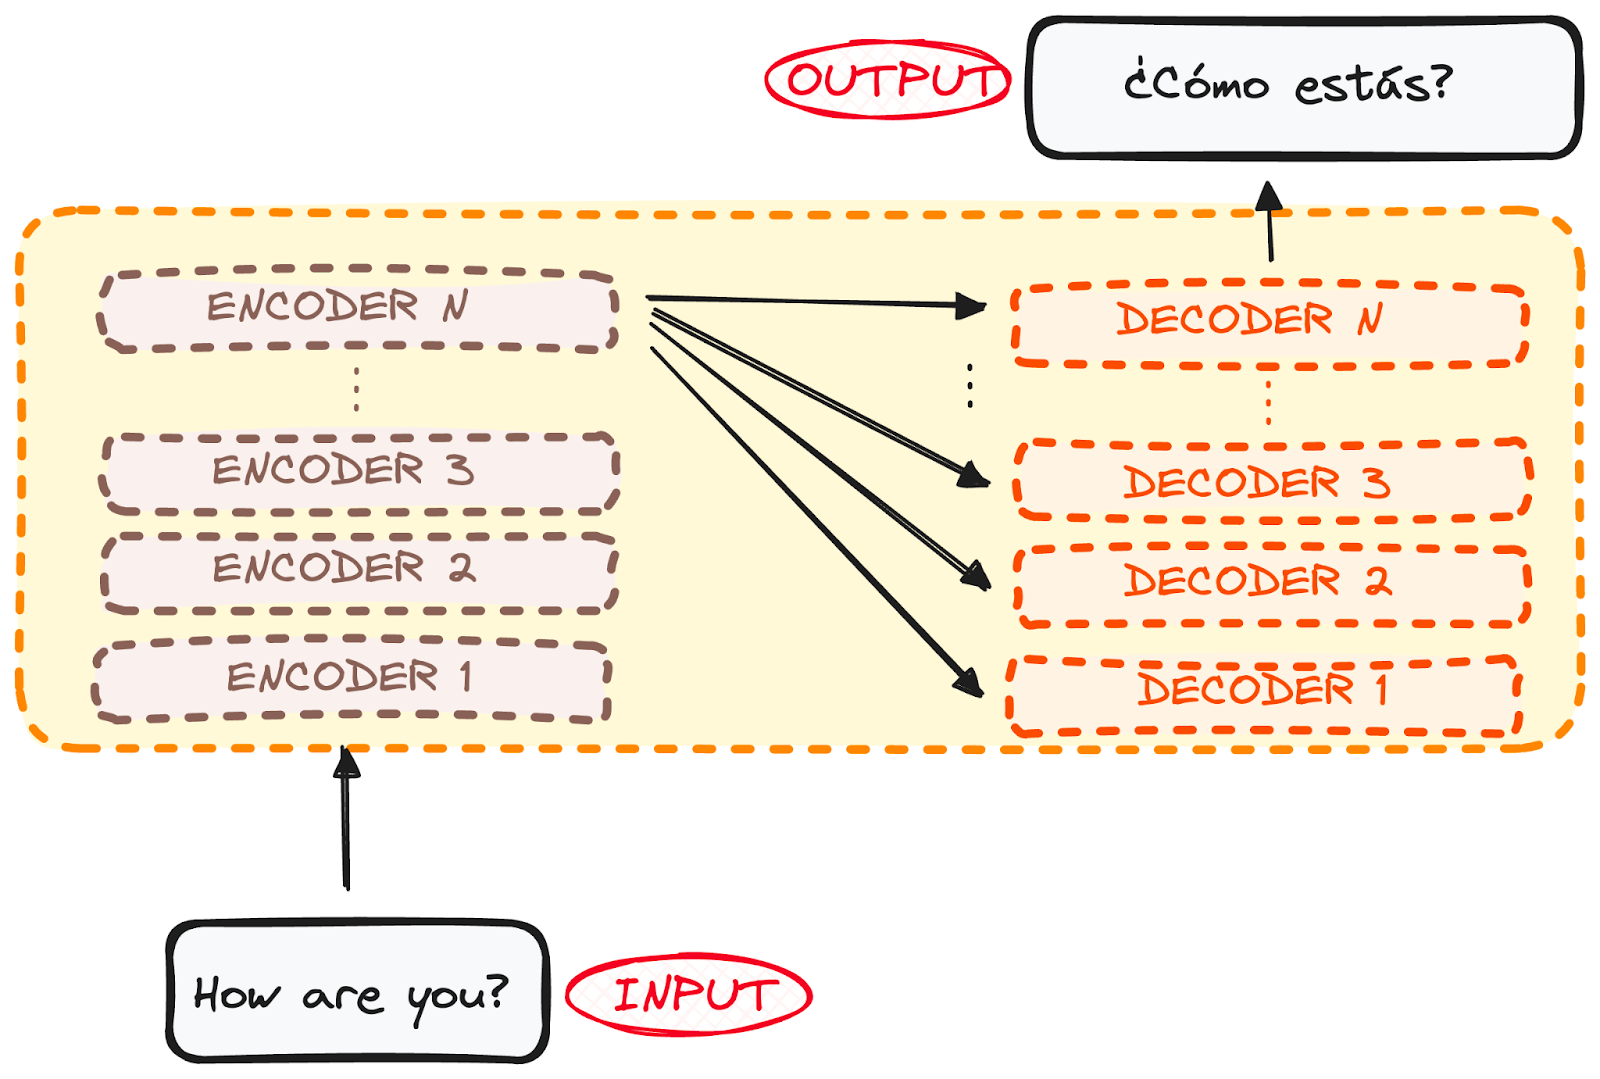

So now that we have a generic idea of the overall Transformer architecture, let’s focus on both Encoders and Decoders to understand better their working flow:

### The Encoder Workflow

The encoder is a fundamental component of the Transformer architecture. The primary function of the encoder is to transform the input tokens into contextualized representations. Unlike earlier models that processed tokens independently, the Transformer encoder captures the context of each token with respect to the entire sequence.

Its structure composition consists as follows:

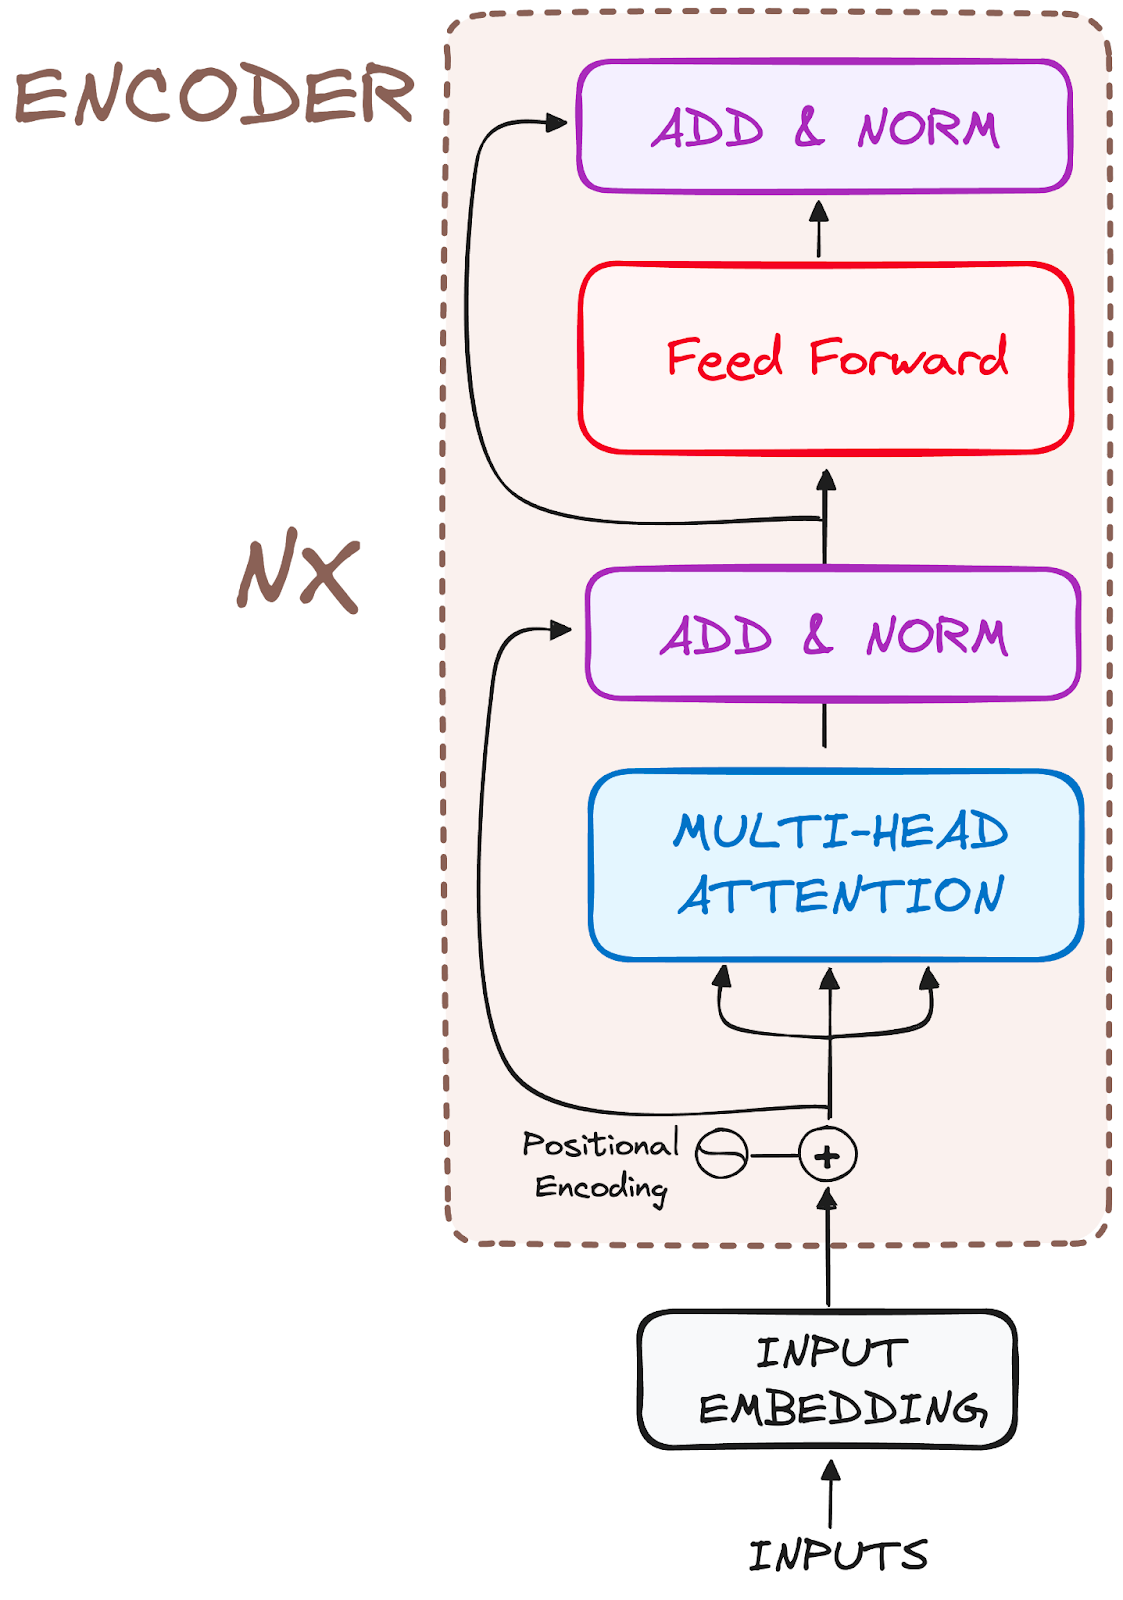

So let’s break its workflow into its most basic steps:

#### Step 1 - Input Embeddings

The embedding only happens in the bottom-most encoder. The encoder begins by converting input tokens - words or subwords - into vectors using embedding layers. These embeddings capture the semantic meaning of the tokens and convert them into numerical vectors.

All the encoders receive a list of vectors, each of size 512 (fixed-sized). In the bottom encoder, that would be the word embeddings, but in other encoders, it would be the output of the encoder that’s directly below them.

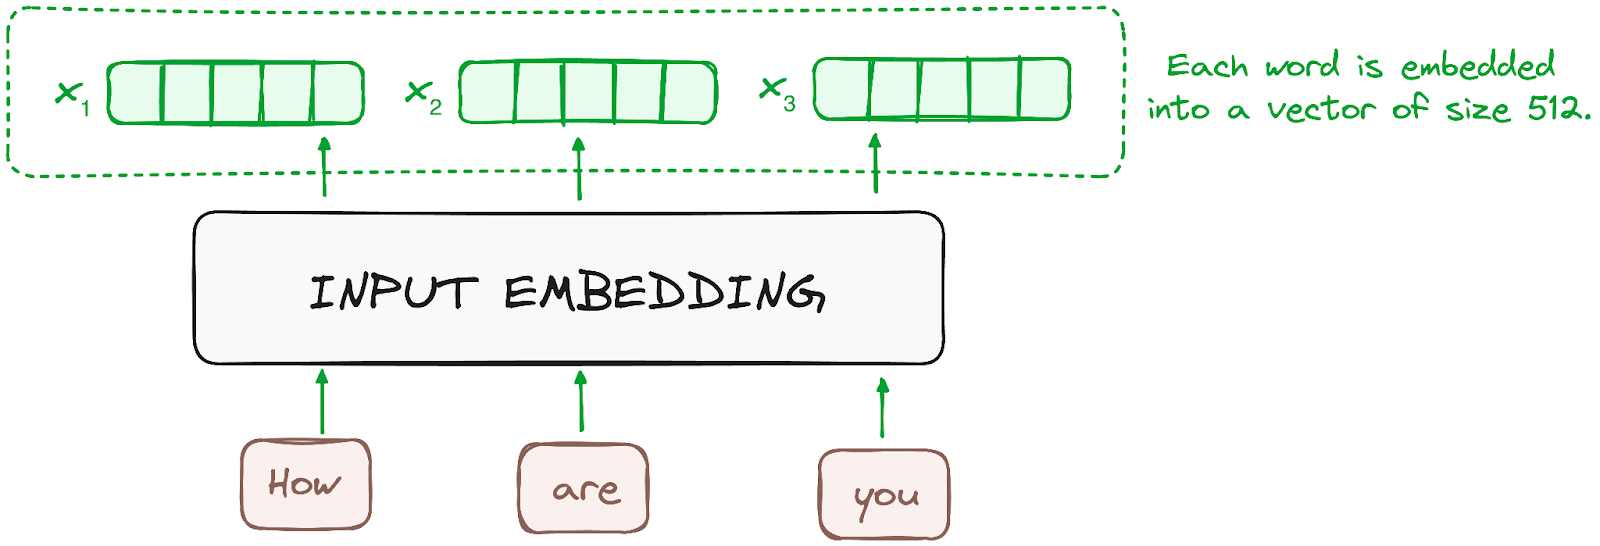

#### Step 2 - Positional Encoding

Since Transformers do not have a recurrence mechanism like RNNs, they use positional encodings added to the input embeddings to provide information about the position of each token in the sequence. This allows them to understand the position of each word within the sentence.

To do so, the researchers suggested employing a combination of various sine and cosine functions to create positional vectors, enabling the use of this positional encoder for sentences of any length.

In this approach, each dimension is represented by unique frequencies and offsets of the wave, with the values ranging from -1 to 1, effectively representing each position.

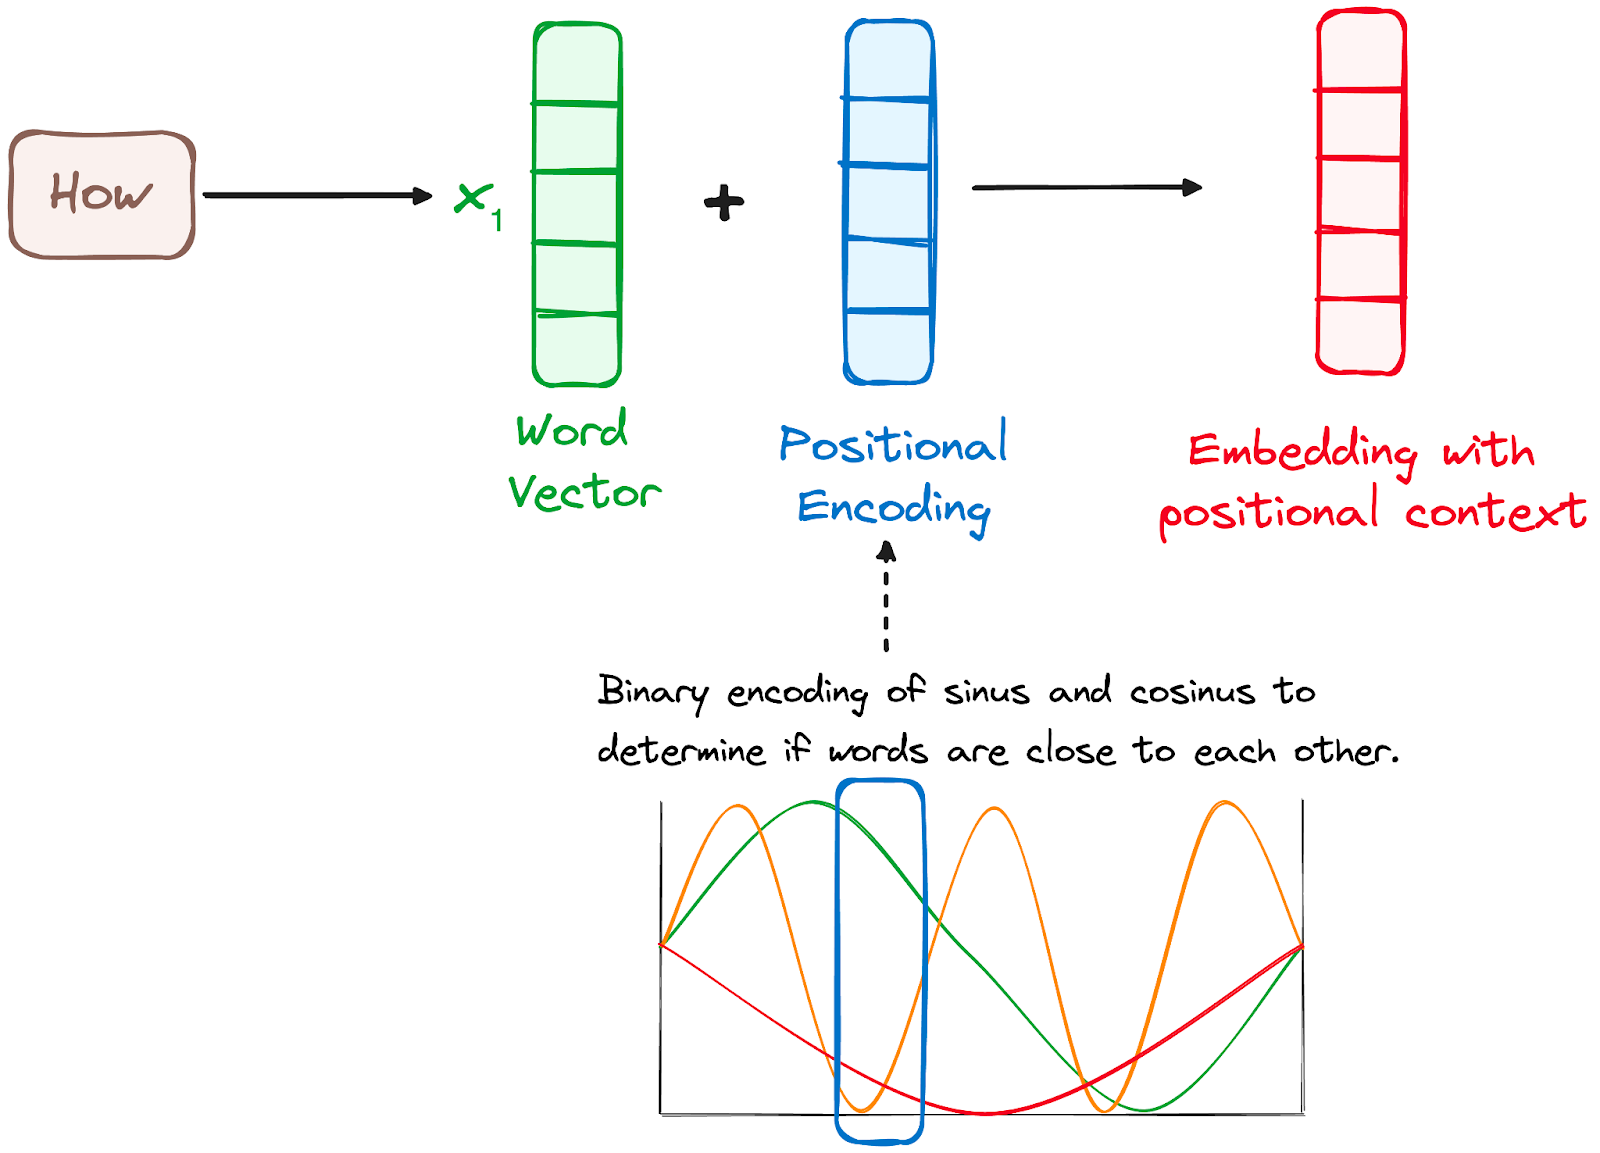

#### Step 3 - Stack of Encoder Layers

The Transformer encoder consists of a stack of identical layers (6 in the original Transformer model).

The encoder layer serves to transform all input sequences into a continuous, abstract representation that encapsulates the learned information from the entire sequence. This layer comprises two sub-modules:

 - A multi-headed attention mechanism.
 - A fully connected network.

Additionally, it incorporates residual connections around each sublayer, which are then followed by layer normalization.

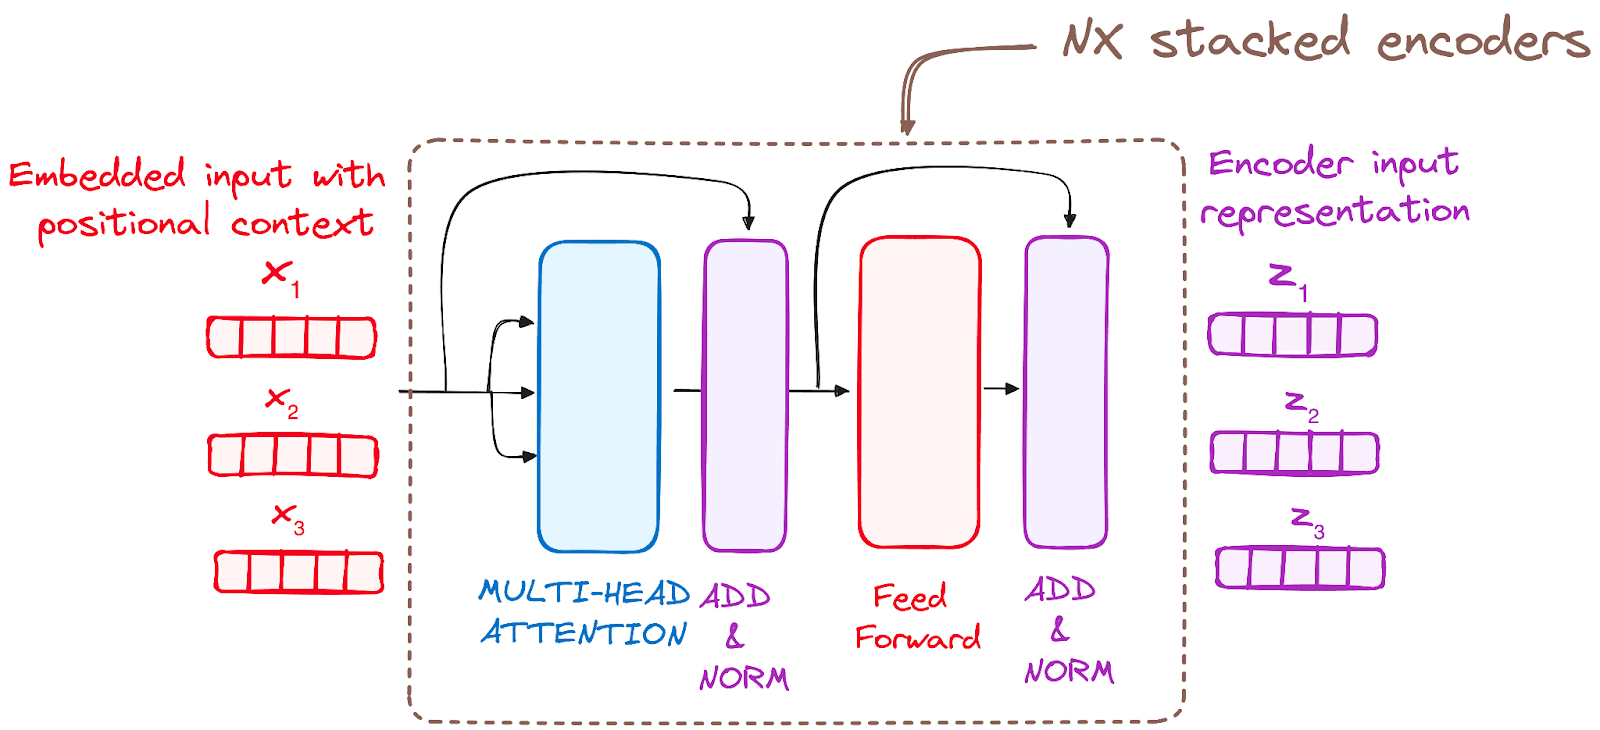


#### Step 3.1 Multi-Headed Self-Attention Mechanism

In the encoder, the multi-headed attention utilizes a specialized attention mechanism known as self-attention. This approach enables the models to relate each word in the input with other words. For instance, in a given example, the model might learn to connect the word “are” with “you”.

This mechanism allows the encoder to focus on different parts of the input sequence as it processes each token. It computes attention scores based on:

 - A query is a vector that represents a specific word or token from the input sequence in the attention mechanism.
 - A key is also a vector in the attention mechanism, corresponding to each word or token in the input sequence.
 - Each value is associated with a key and is used to construct the output of the attention layer. When a query and a key match well, which basically means that they have a high attention score, the corresponding value is emphasized in the output.

This first Self-Attention module enables the model to capture contextual information from the entire sequence. Instead of performing a single attention function, queries, keys and values are linearly projected h times. On each of these projected versions of queries, keys and values the attention mechanism is performed in parallel, yielding h-dimensional output values.

The detailed architecture goes as follows:

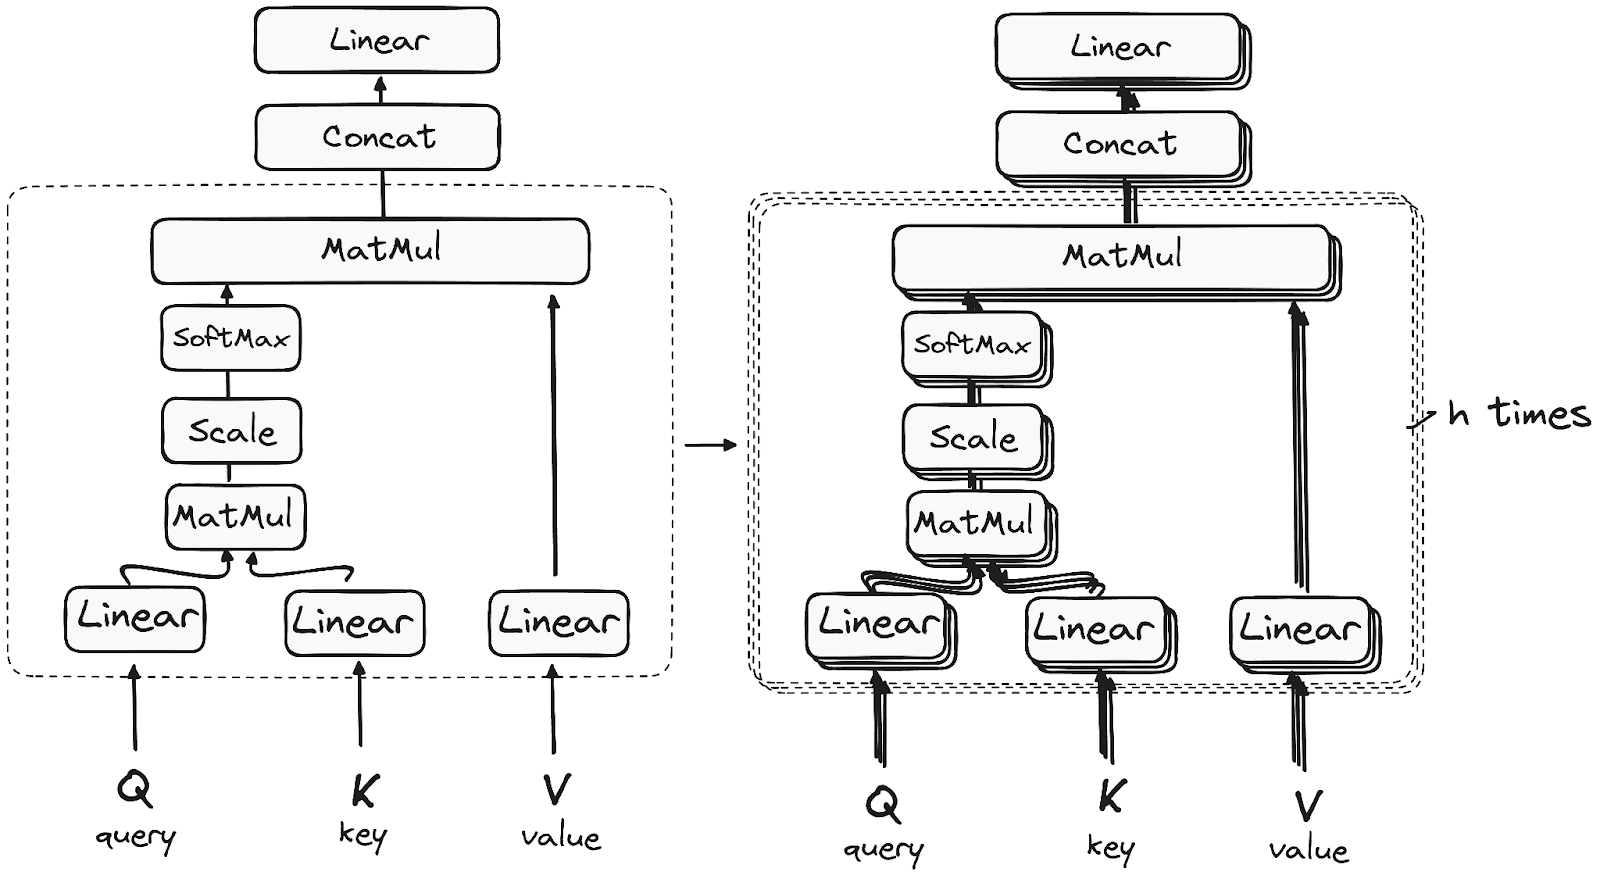

##### Matrix Multiplication (MatMul) - Dot Product of Query and Key
Once the query, key, and value vectors are passed through a linear layer, a dot product matrix multiplication is performed between the queries and keys, resulting in the creation of a score matrix.

The score matrix establishes the degree of emphasis each word should place on other words. Therefore, each word is assigned a score in relation to other words within the same time step. A higher score indicates greater focus.

This process effectively maps the queries to their corresponding keys.

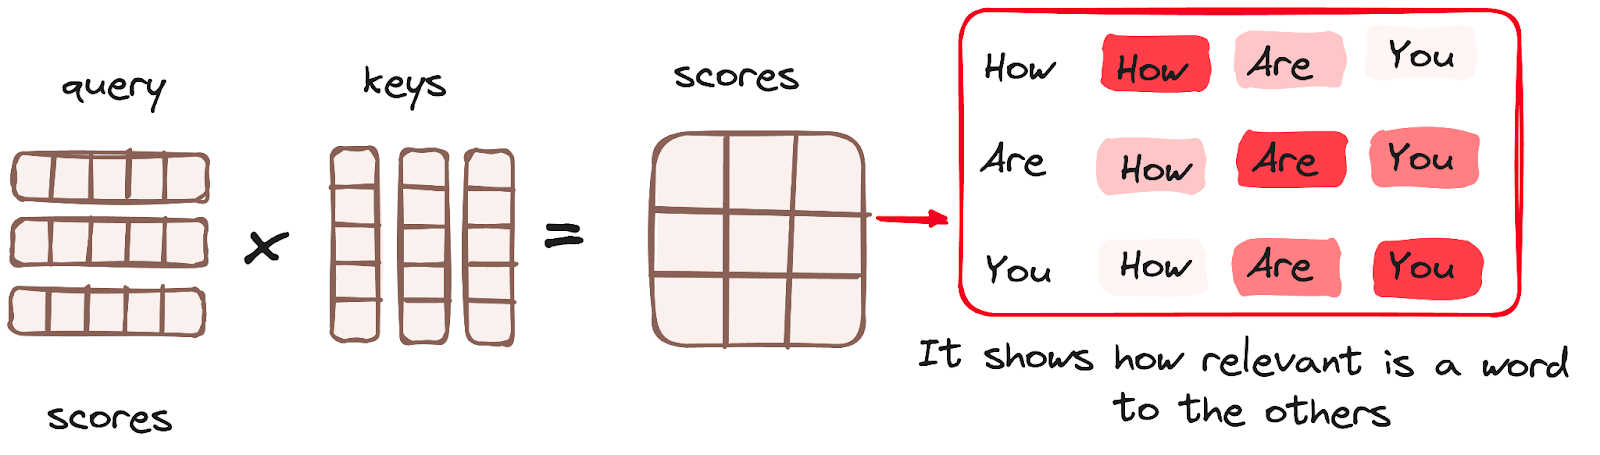

##### Reducing the Magnitude of attention scores

The scores are then scaled down by dividing them by the square root of the dimension of the query and key vectors. This step is implemented to ensure more stable gradients, as the multiplication of values can lead to excessively large effects.

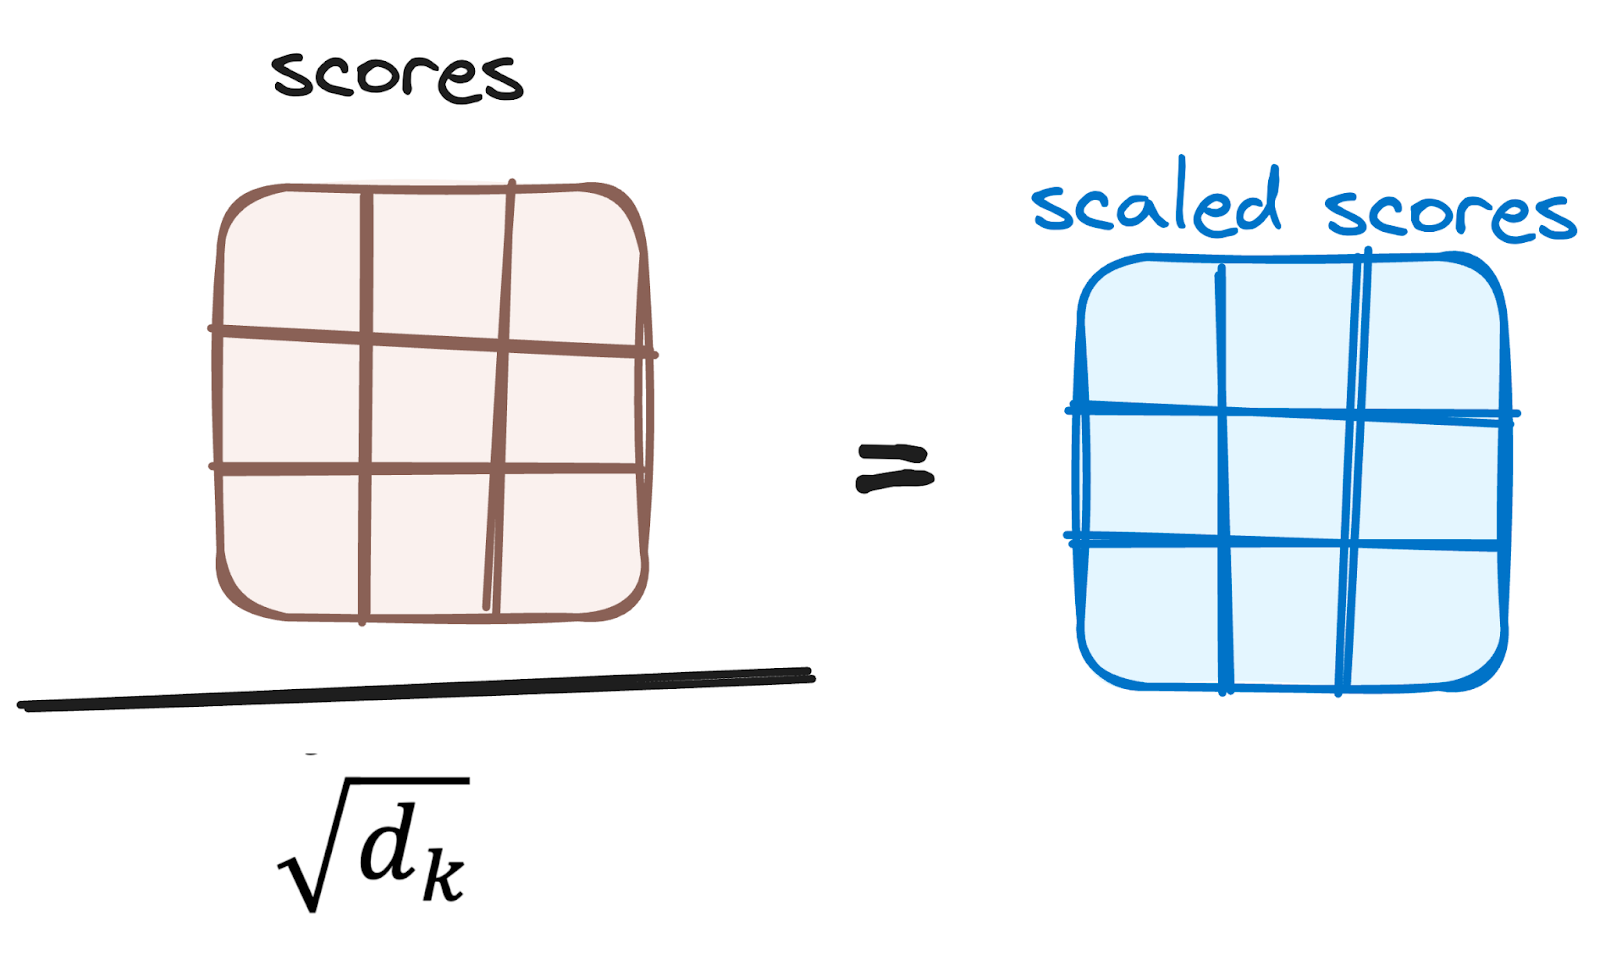

##### Applying Softmax to the Adjusted Scores

Subsequently, a softmax function is applied to the adjusted scores to obtain the attention weights. This results in probability values ranging from 0 to 1. The softmax function emphasizes higher scores while diminishing lower scores, thereby enhancing the model's ability to effectively determine which words should receive more attention.

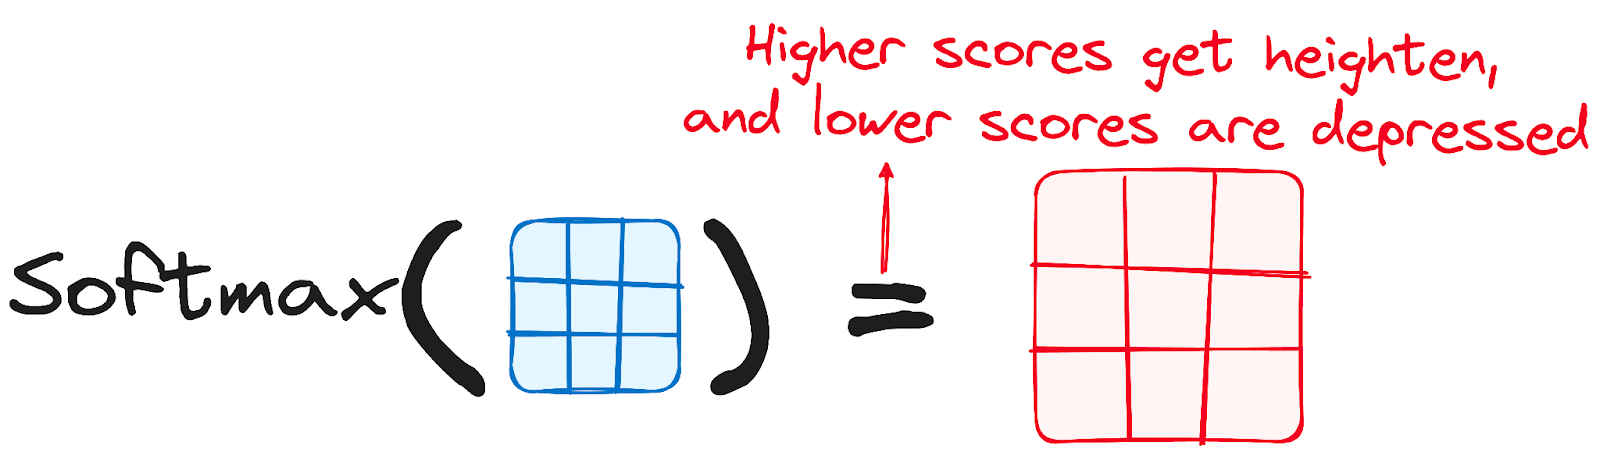


##### Combining Softmax Results with the Value Vector

The following step of the attention mechanism is that weights derived from the softmax function are multiplied by the value vector, resulting in an output vector.

In this process, only the words that present high softmax scores are preserved. Finally, this output vector is fed into a linear layer for further processing.

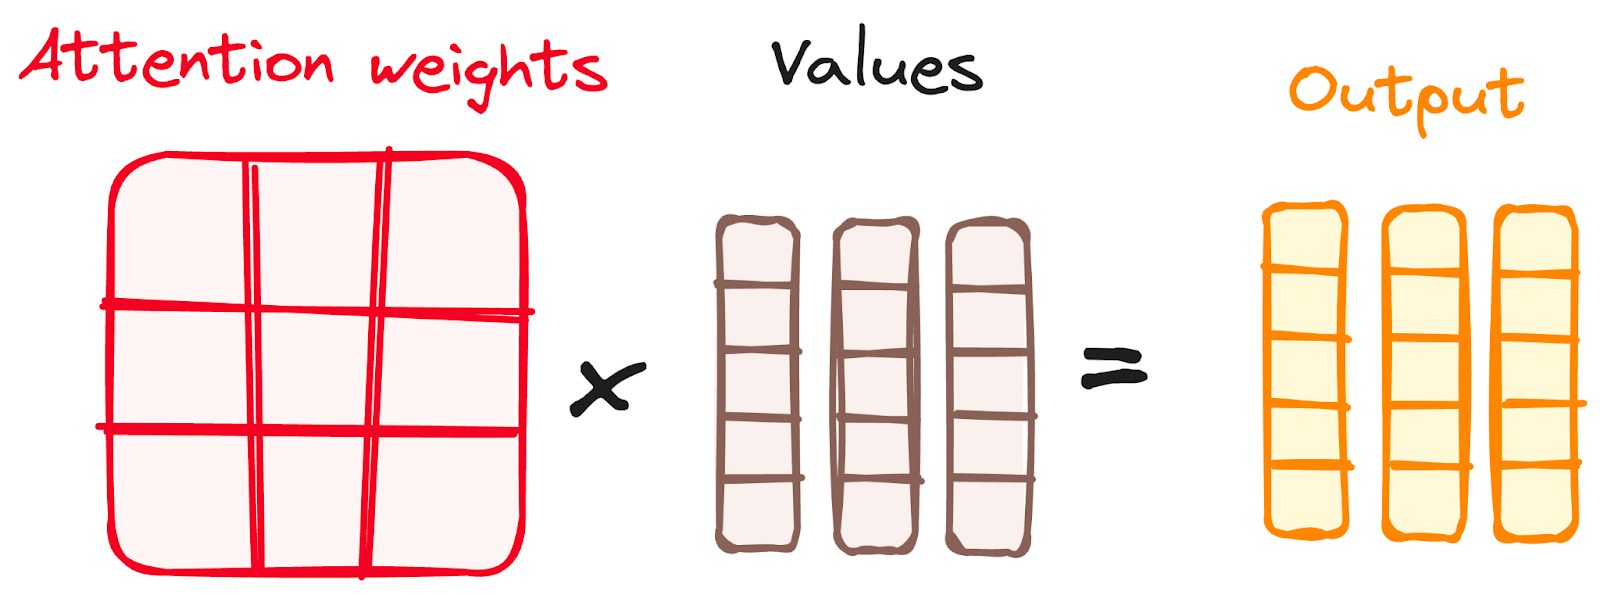

And we finally get the output of the Attention mechanism!

So, you might be wondering why it’s called Multi-Head Attention?

Remember that before all the process starts, we break our queries, keys and values h times. This process, known as self-attention, happens separately in each of these smaller stages or 'heads'. Each head works its magic independently, conjuring up an output vector.

This ensemble passes through a final linear layer, much like a filter that fine-tunes their collective performance. The beauty here lies in the diversity of learning across each head, enriching the encoder model with a robust and multifaceted understanding.

#### Step 3.2 Normalization and Residual Connections
Each sub-layer in an encoder layer is followed by a normalization step. Also, each sub-layer output is added to its input (residual connection) to help mitigate the vanishing gradient problem, allowing deeper models. This process will be repeated after the Feed-Forward Neural Network too.

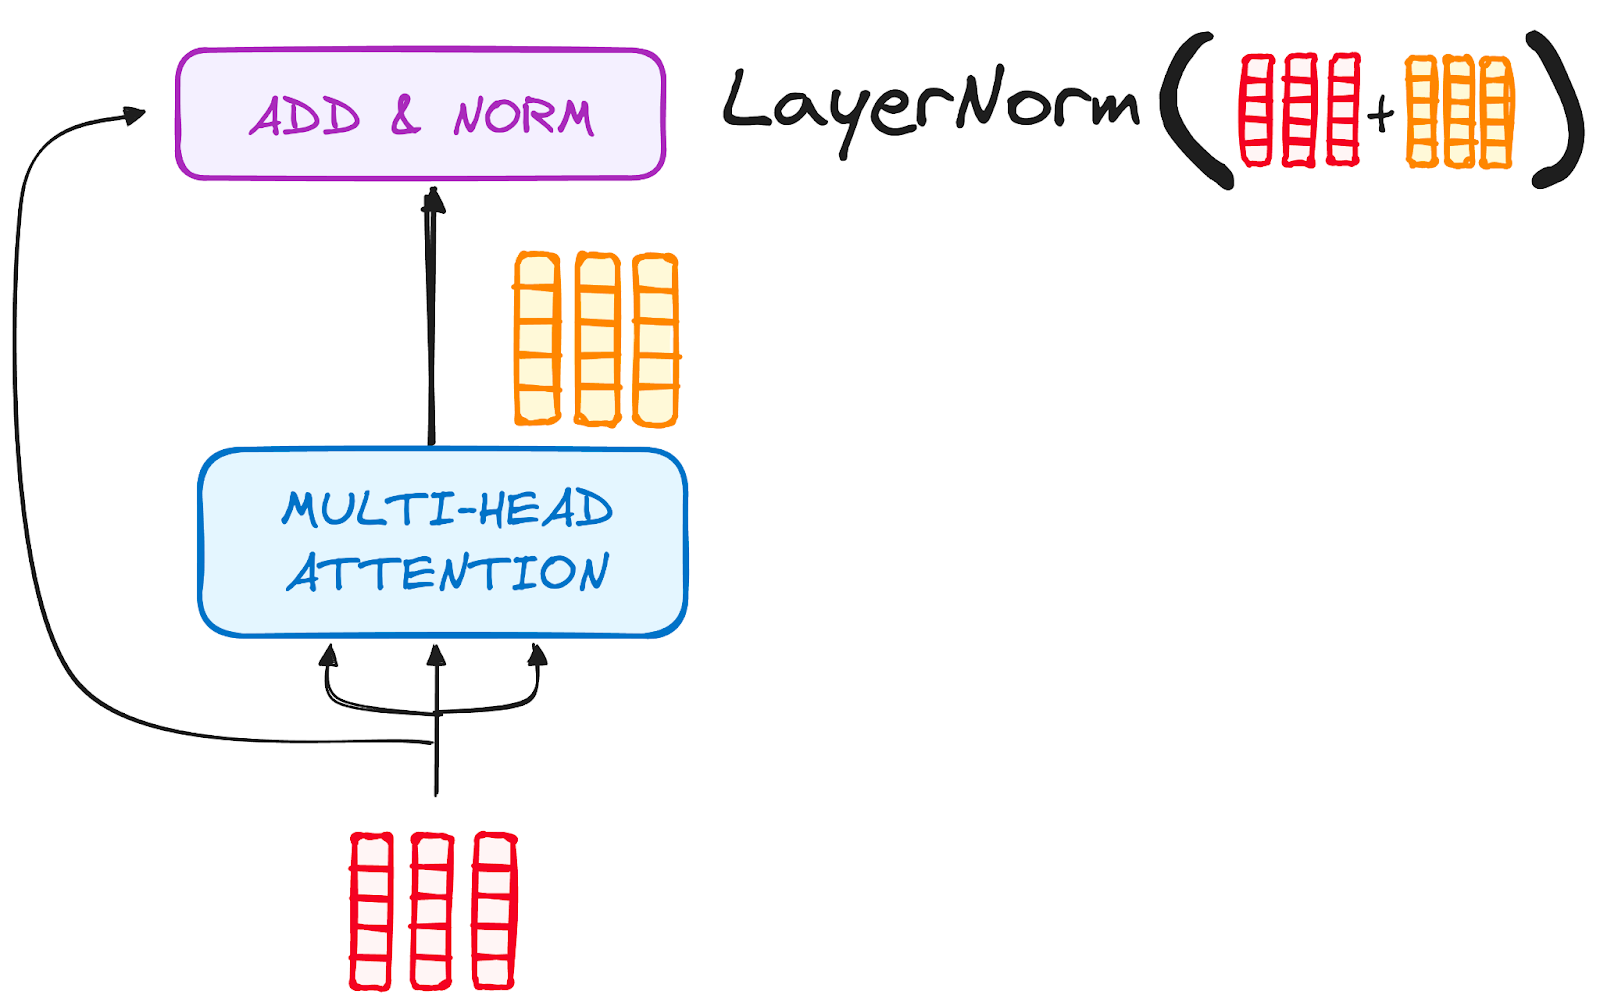

#### Step 3.3 Feed-Forward Neural Network
The journey of the normalized residual output continues as it navigates through a pointwise feed-forward network, a crucial phase for additional refinement.

Picture this network as a duo of linear layers, with a ReLU activation nestled in between them, acting as a bridge. Once processed, the output embarks on a familiar path: it loops back and merges with the input of the pointwise feed-forward network.

This reunion is followed by another round of normalization, ensuring everything is well-adjusted and in sync for the next steps.

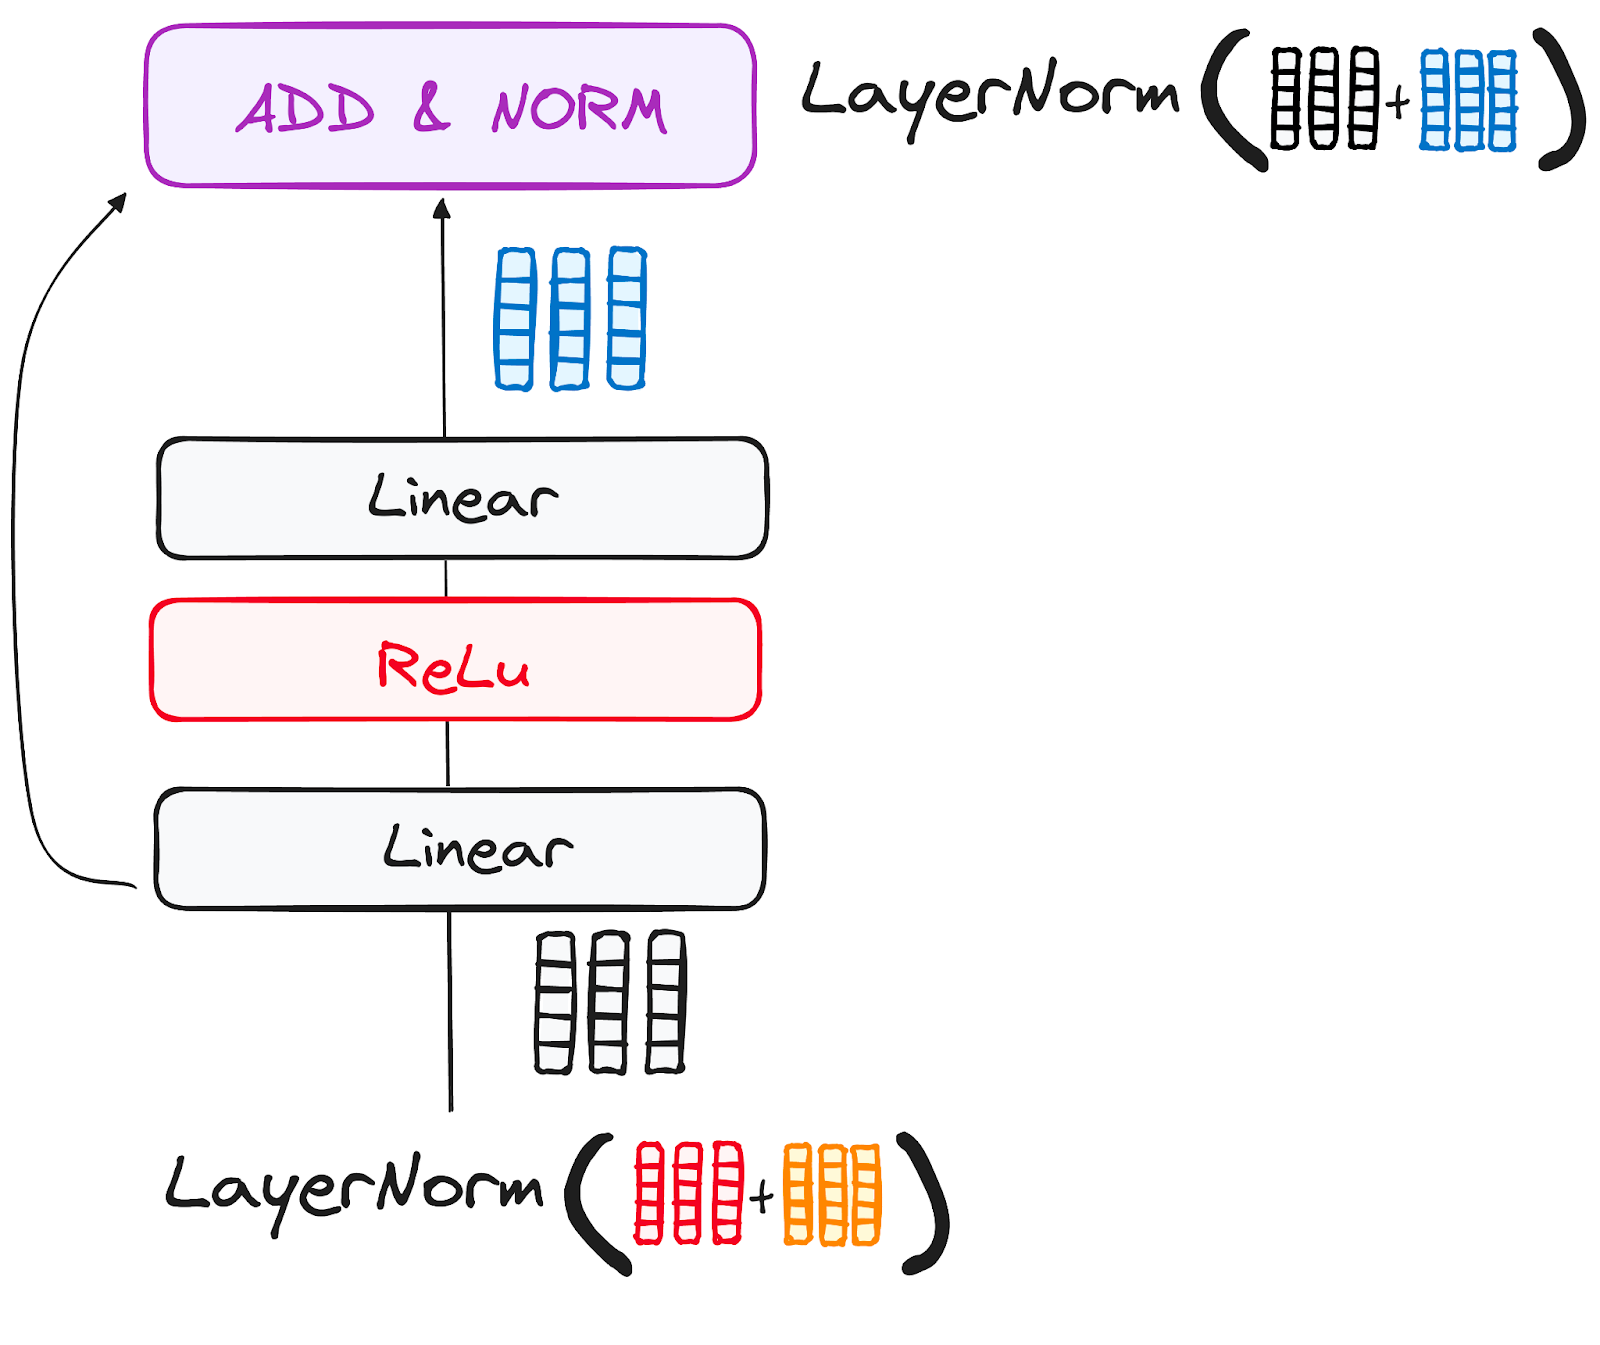


#### Step 4 - Output of the Encoder

The output of the final encoder layer is a set of vectors, each representing the input sequence with a rich contextual understanding. This output is then used as the input for the decoder in a Transformer model.

This careful encoding paves the way for the decoder, guiding it to pay attention to the right words in the input when it's time to decode.

Think of it like building a tower, where you can stack up N encoder layers. Each layer in this stack gets a chance to explore and learn different facets of attention, much like layers of knowledge. This not only diversifies the understanding but could significantly amplify the predictive capabilities of the transformer network.

### The Decoder Workflow

The decoder's role centers on crafting text sequences. Mirroring the encoder, the decoder is equipped with a similar set of sub-layers. It boasts two multi-headed attention layers, a pointwise feed-forward layer, and incorporates both residual connections and layer normalization after each sub-layer.

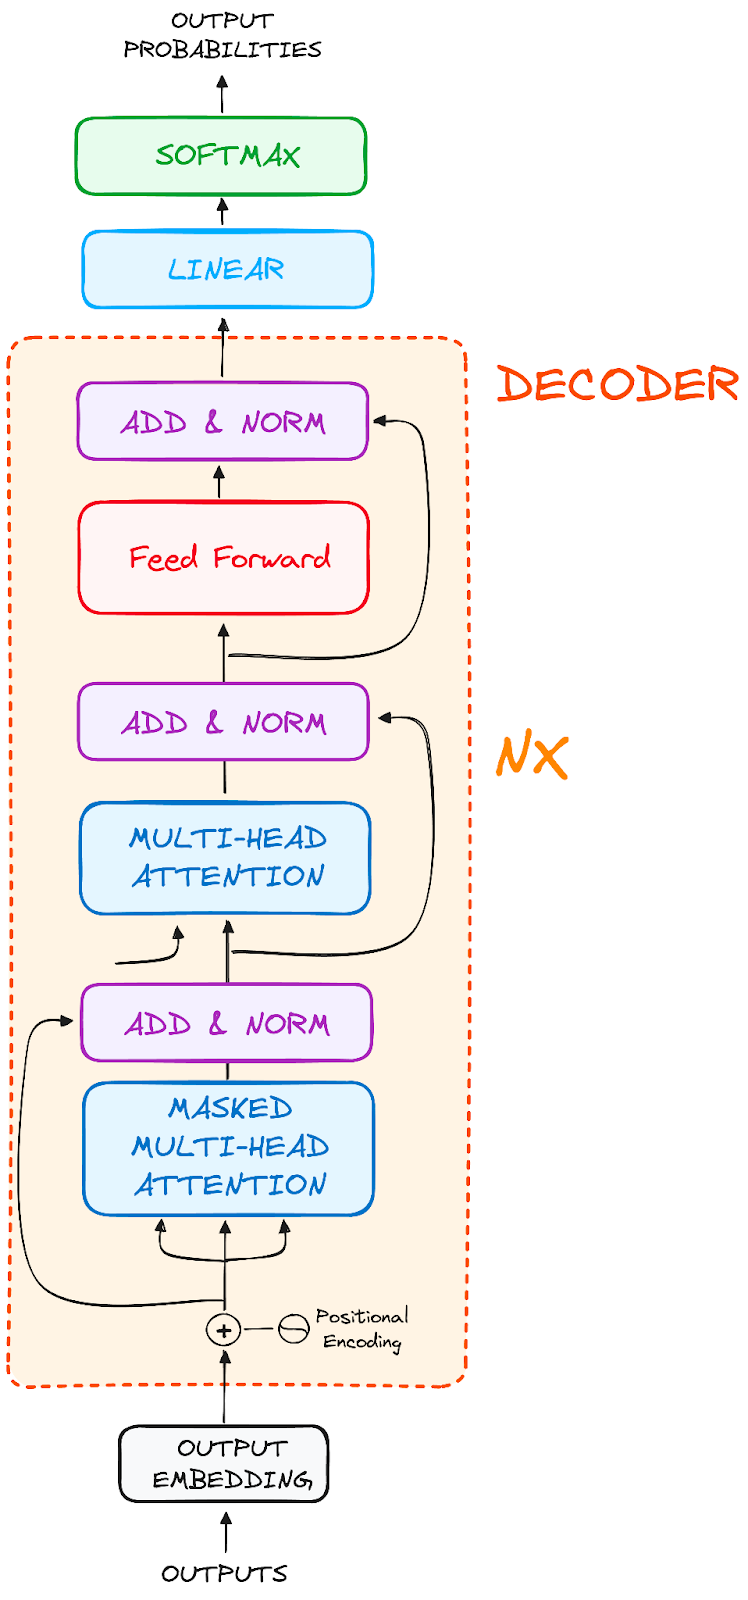

These components function in a way akin to the encoder's layers, yet with a twist: each multi-headed attention layer in the decoder has its unique mission.

The final of the decoder's process involves a linear layer, serving as a classifier, topped off with a softmax function to calculate the probabilities of different words.

The Transformer decoder has a structure specifically designed to generate this output by decoding the encoded information step by step.

It is important to notice that the decoder operates in an autoregressive manner, kickstarting its process with a start token. It cleverly uses a list of previously generated outputs as its inputs, in tandem with the outputs from the encoder that are rich with attention information from the initial input.

This sequential dance of decoding continues until the decoder reaches a pivotal moment: the generation of a token that signals the end of its output creation.

#### Step 1 - Output Embeddings

At the decoder's starting line, the process mirrors that of the encoder. Here, the input first passes through an embedding layer.

#### Step 2 - Positional Encoding

Following the embedding, again just like the decoder, the input passes by the positional encoding layer. This sequence is designed to produce positional embeddings.

These positional embeddings are then channeled into the first multi-head attention layer of the decoder, where the attention scores specific to the decoder’s input are meticulously computed.

#### Step 3 - Stack of Decoder Layers

The decoder consists of a stack of identical layers (6 in the original Transformer model). Each layer has three main sub-components:

##### Step 3.1 Masked Self-Attention Mechanism

This is similar to the self-attention mechanism in the encoder but with a crucial difference: it prevents positions from attending to subsequent positions, which means that each word in the sequence isn't influenced by future tokens.

For instance, when the attention scores for the word "are" are being computed, it's important that "are" doesn't get a peek at "you", which is a subsequent word in the sequence.

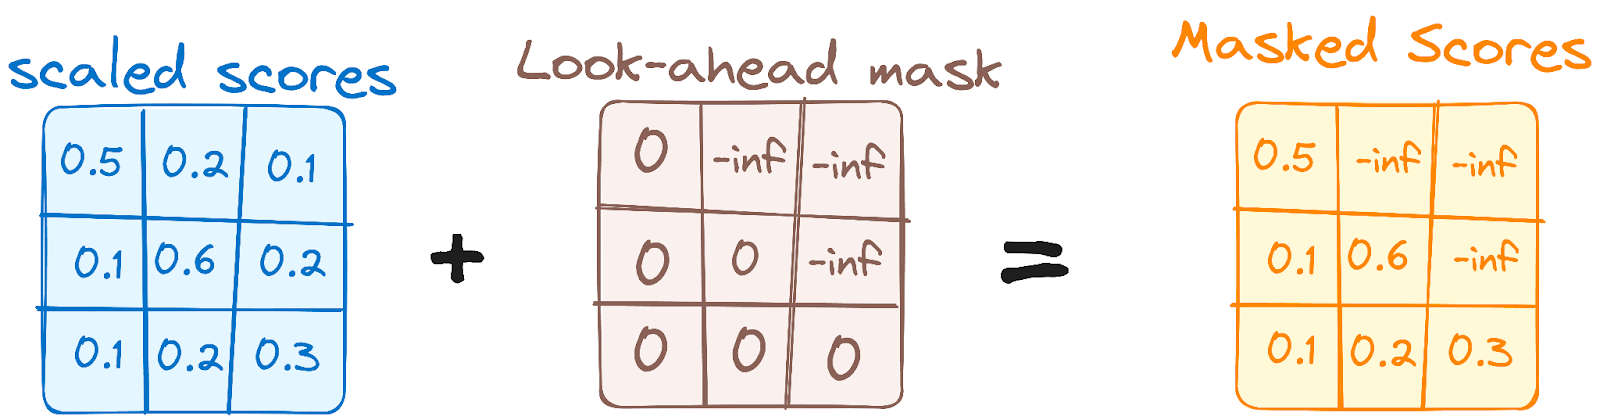

This masking ensures that the predictions for a particular position can only depend on known outputs at positions before it.

##### Step 3.2 - Encoder-Decoder Multi-Head Attention or Cross Attention

In the second multi-headed attention layer of the decoder, we see a unique interplay between the encoder and decoder's components. Here, the outputs from the encoder take on the roles of both queries and keys, while the outputs from the first multi-headed attention layer of the decoder serve as values.

This setup effectively aligns the encoder's input with the decoder's, empowering the decoder to identify and emphasize the most relevant parts of the encoder's input.

Following this, the output from this second layer of multi-headed attention is then refined through a pointwise feedforward layer, enhancing the processing further.

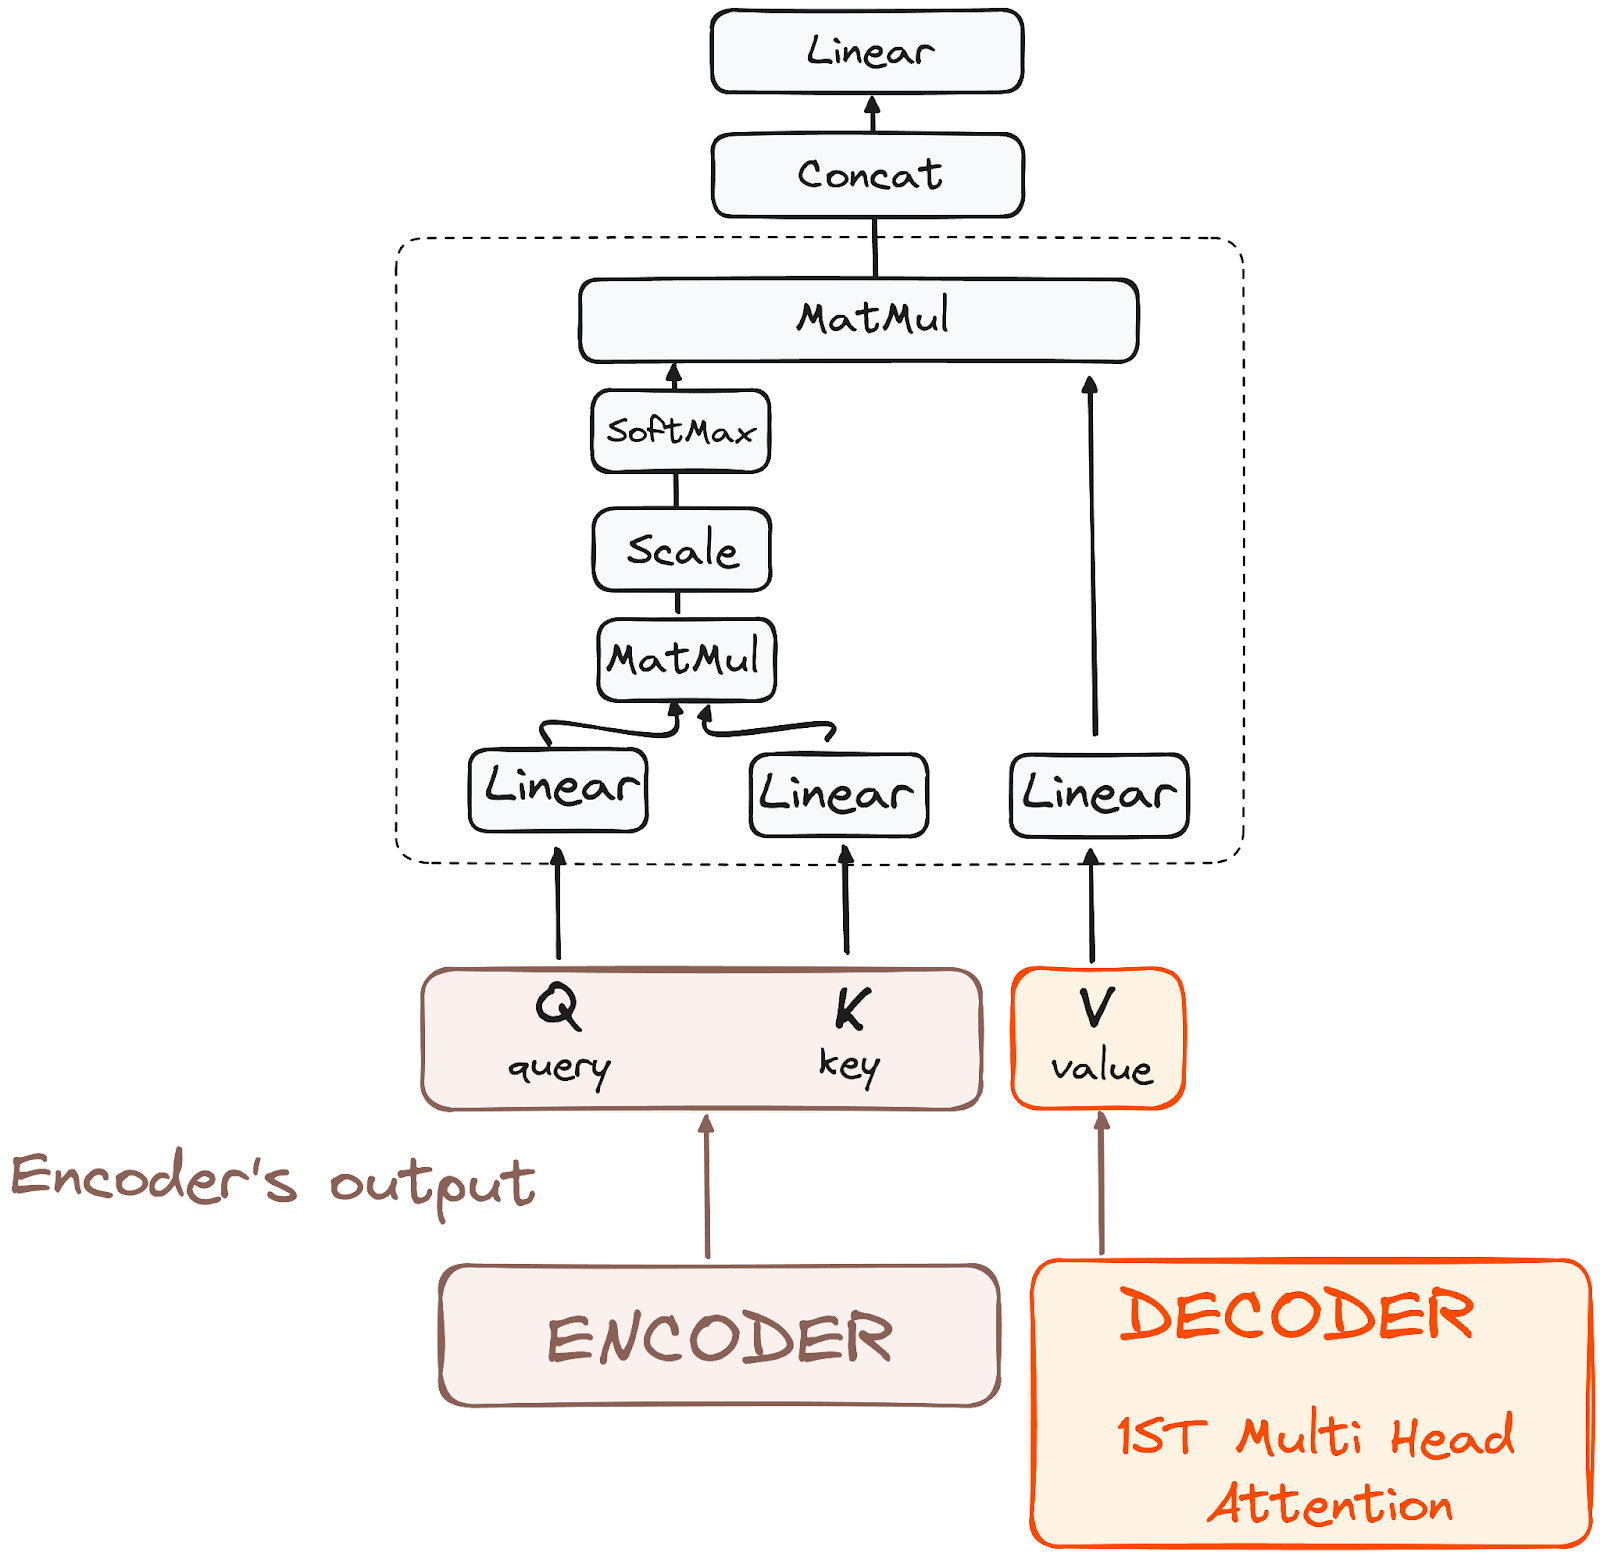

In this sub-layer, the queries come from the previous decoder layer, and the keys and values come from the output of the encoder. This allows every position in the decoder to attend over all positions in the input sequence, effectively integrating information from the encoder with the information in the decoder.

##### Step 3.3 Feed-Forward Neural Network

Similar to the encoder, each decoder layer includes a fully connected feed-forward network, applied to each position separately and identically.

#### Step 4 - Linear Classifier and Softmax for Generating Output Probabilities

The journey of data through the transformer model culminates in its passage through a final linear layer, which functions as a classifier.

The size of this classifier corresponds to the total number of classes involved (number of words contained in the vocabulary). For instance, in a scenario with 1000 distinct classes representing 1000 different words, the classifier's output will be an array with 1000 elements.

This output is then introduced to a softmax layer, which transforms it into a range of probability scores, each lying between 0 and 1. The highest of these probability scores is key,its corresponding index directly points to the word that the model predicts as the next in the sequence.

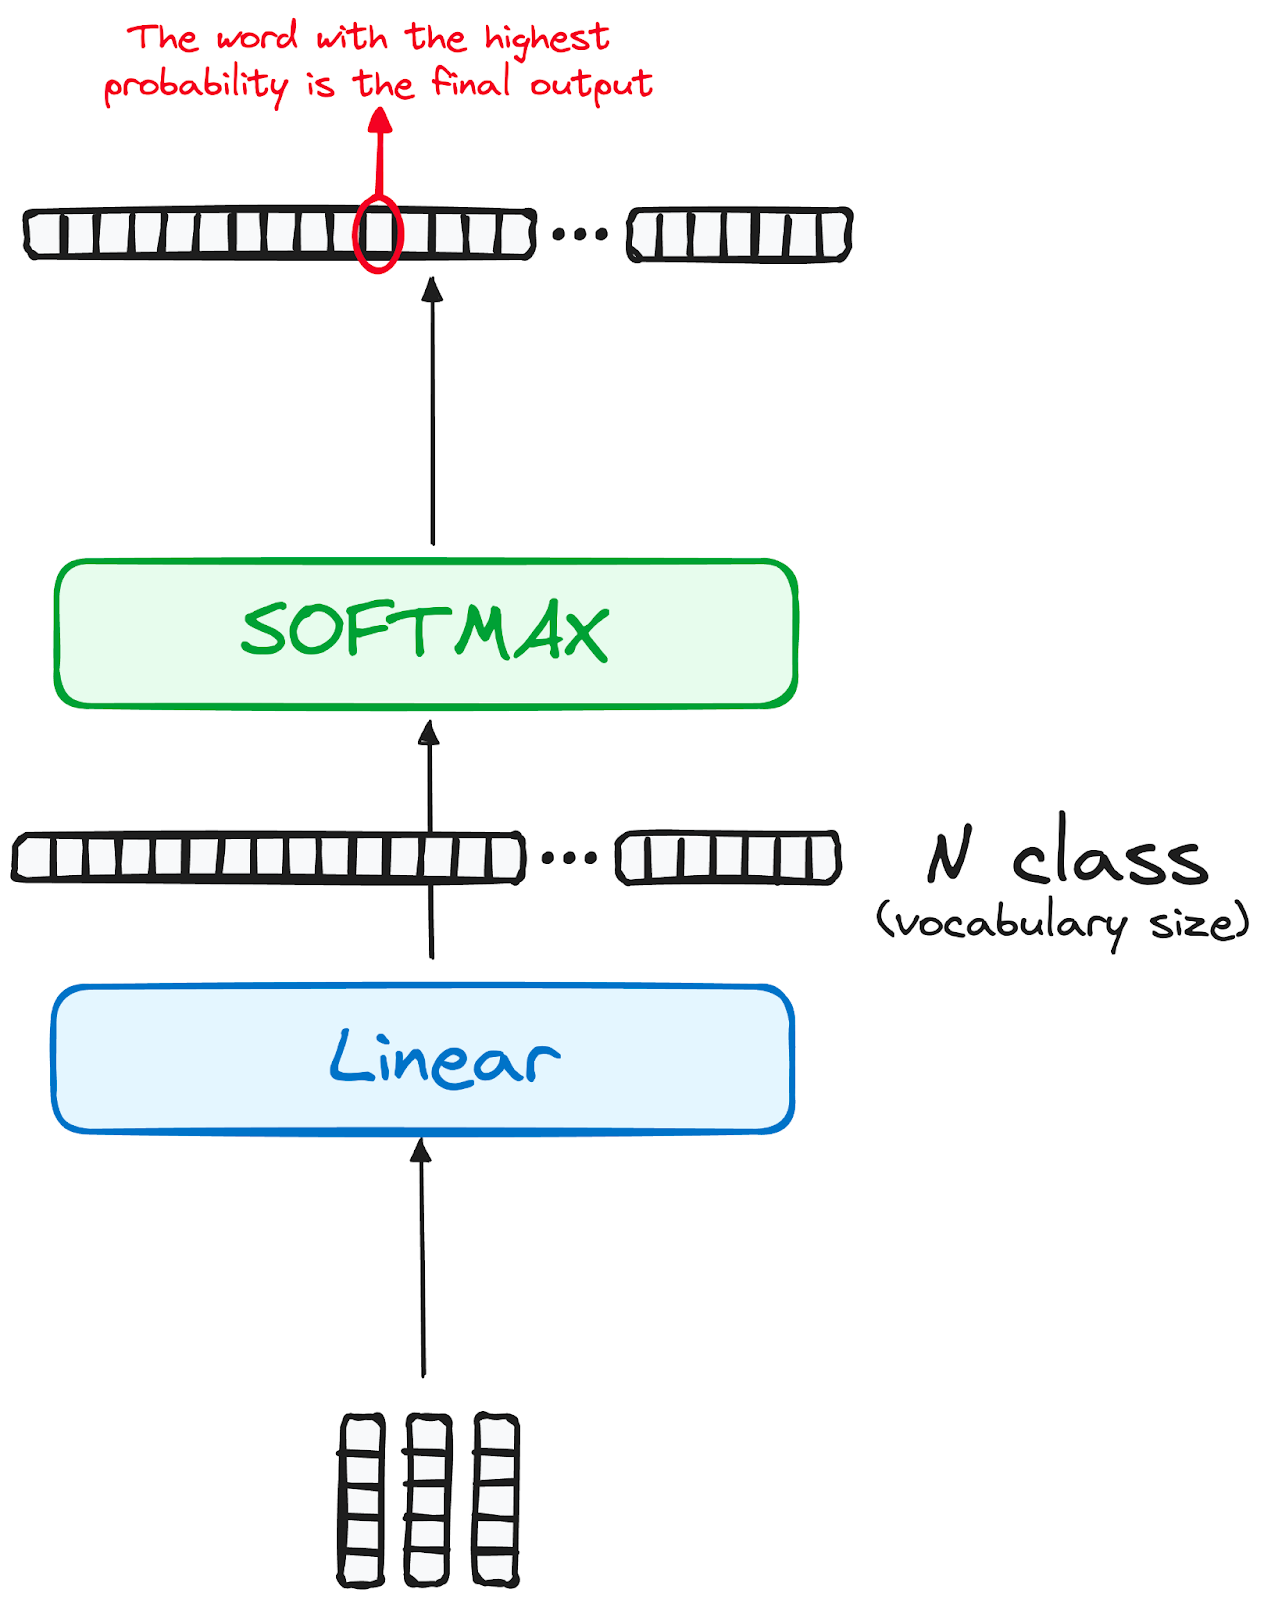

#### Normalization and Residual Connections

Each sub-layer (masked self-attention, encoder-decoder attention, feed-forward network) is followed by a normalization step, and each also includes a residual connection around it.

#### Output of the Decoder

The final layer's output is transformed into a predicted sequence, typically through a linear layer followed by a softmax to generate probabilities over the vocabulary.

The decoder, in its operational flow, incorporates the freshly generated output into its growing list of inputs, and then proceeds with the decoding process. This cycle repeats until the model predicts a specific token, signaling completion.

The token predicted with the highest probability is assigned as the concluding class, often represented by the end token.

Again remember that the decoder isn't limited to a single layer. It can be structured with N layers, each one building upon the input received from the encoder and its preceding layers. This layered architecture allows the model to diversify its focus and extract varying attention patterns across its attention heads.

Such a multi-layered approach can significantly enhance the model’s ability to predict, as it develops a more nuanced understanding of different attention combinations.

And the final architecture is something similar like this (form the original paper)

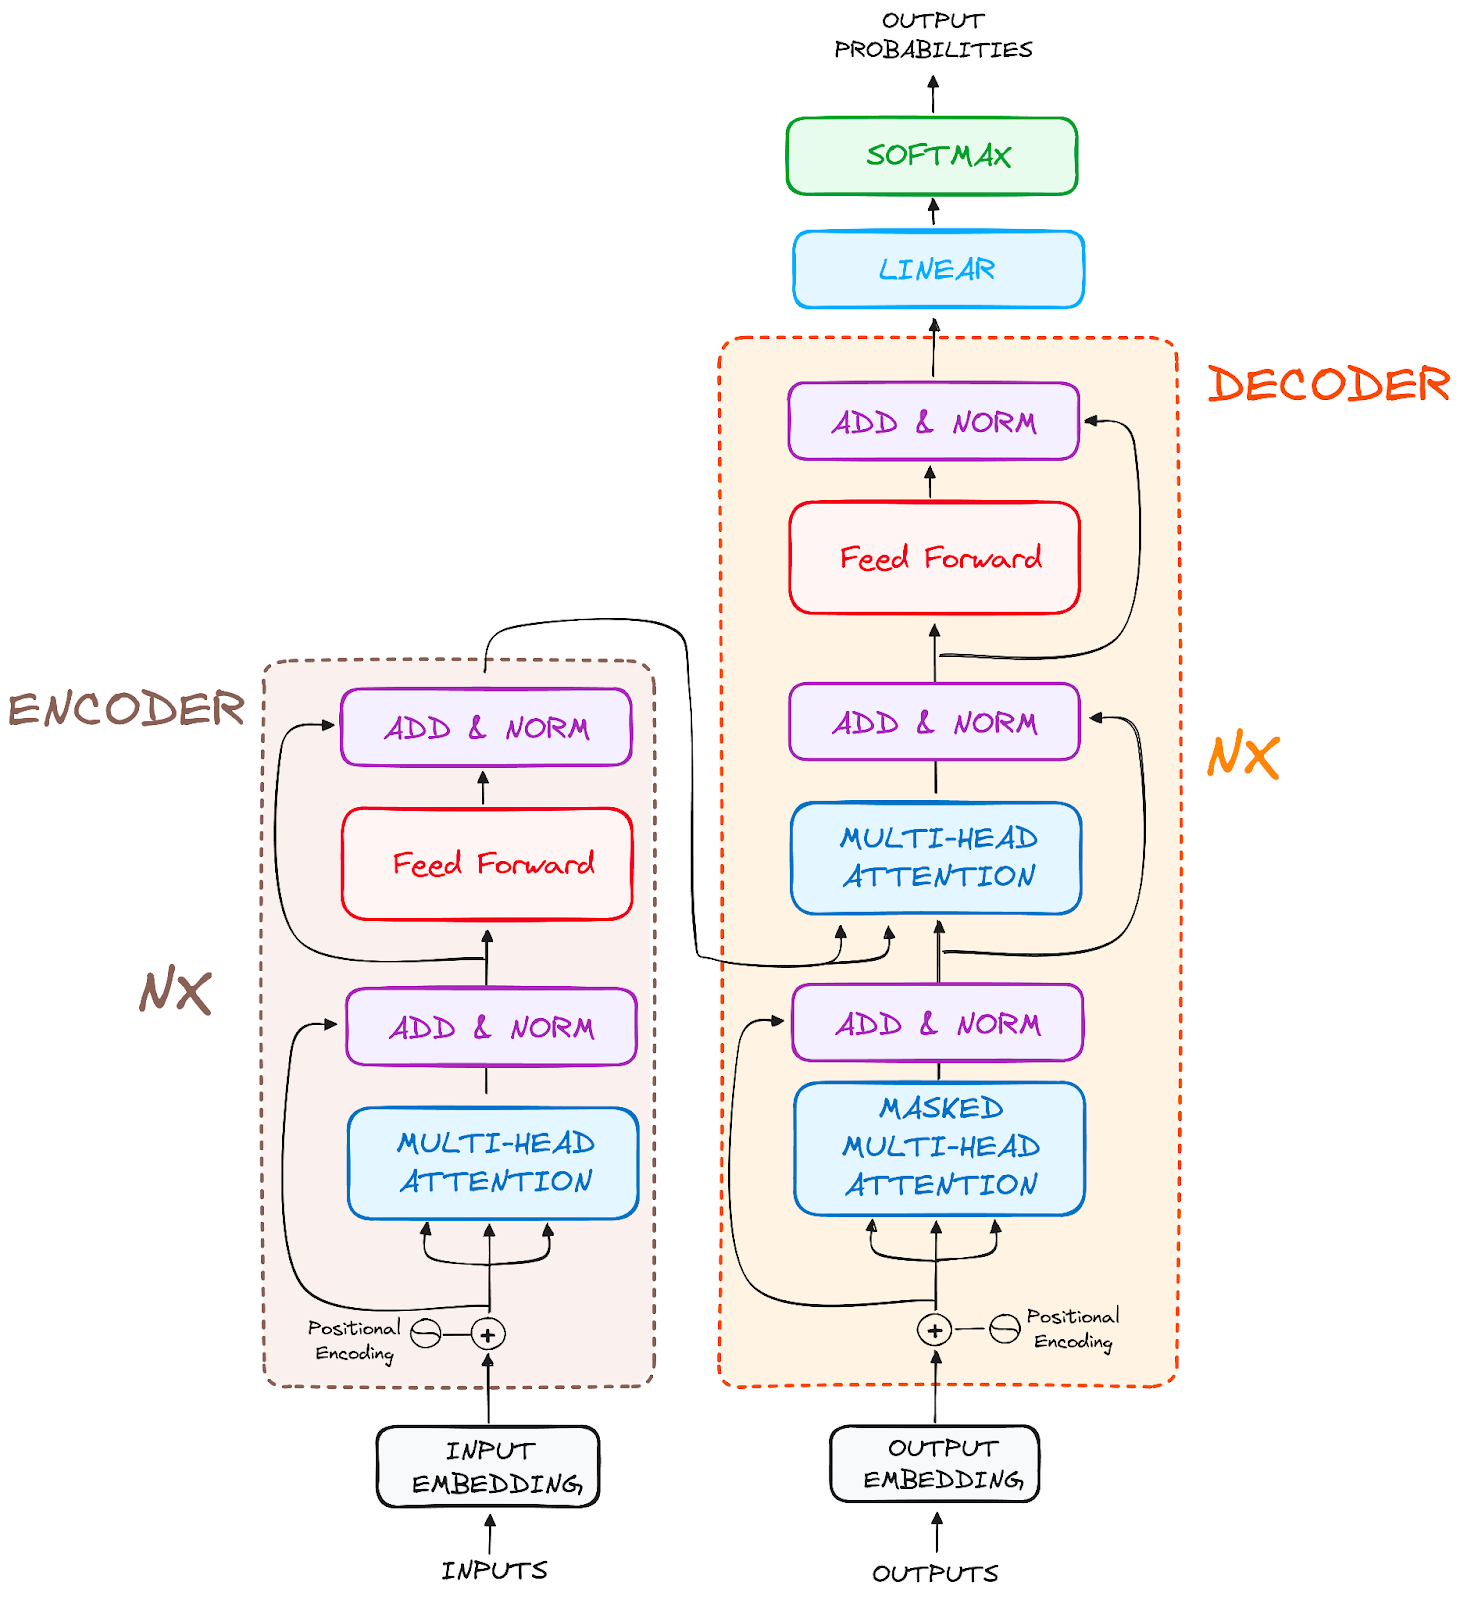

### Real-Life Transformer Models

#### BERT

Google's 2018 release of BERT, an open-source natural language processing framework, revolutionized NLP with its unique bidirectional training, which enables the model to have more context-informed predictions about what the next word should be.

By understanding context from all sides of a word, BERT outperformed previous models in tasks like question-answering and understanding ambiguous language. Its core uses Transformers, connecting each output and input element dynamically.

BERT, pre-trained on Wikipedia, excelled in various NLP tasks, prompting Google to integrate it into its search engine for more natural queries. This innovation sparked a race to develop advanced language models and significantly advanced the field's ability to handle complex language understanding.

#### LaMDA

LaMDA (Language Model for Dialogue Applications) is a Transformer-based model developed by Google, designed specifically for conversational tasks, and launched during the 2021 Google I/O keynote. They are designed to generate more natural and contextually relevant responses, enhancing user interactions in various applications.

LaMDA's design enables it to understand and respond to a wide range of topics and user intents, making it ideal for applications in chatbots, virtual assistants, and other interactive AI systems where a dynamic conversation is key.

This focus on conversational understanding and response marks LaMDA as a significant advancement in the field of natural language processing and AI-driven communication.

#### GPT and ChatGPT

GPT and ChatGPT, developed by OpenAI, are advanced generative models known for their ability to produce coherent and contextually relevant text. GPT-1 was its first model launched in June 2018 and GPT-3, one of the most impactful models, was launched two years later in 2020.

These models are adept at a wide range of tasks, including content creation, conversation, language translation, and more. GPT's architecture enables it to generate text that closely resembles human writing, making it useful in applications like creative writing, customer support, and even coding assistance. ChatGPT, a variant optimized for conversational contexts, excels in generating human-like dialogue, enhancing its application in chatbots and virtual assistants.

#### Other Variations

The landscape of foundation models, particularly transformer models, is rapidly expanding. A study identified over 50 significant transformer models, while [the Stanford group evaluated 30 of them](https://arxiv.org/pdf/2302.07730.pdf), acknowledging the field's fast-paced growth. NLP Cloud, an innovative startup part of NVIDIA's Inception program, utilizes around 25 large language models commercially for various sectors like airlines and pharmacies.

There is an increasing trend towards making these models open-source, with platforms like Hugging Face's model hub leading the way. Additionally, numerous Transformer-based models have been developed, each specialized for different NLP tasks, showcasing the model's versatility and efficiency in diverse applications.
